In [2]:
import sympy as sy


In [2]:
sy.QQ

QQ

In [3]:
x,y,z = sy.symbols("x y z")

In [6]:
sy.QQ.old_poly_ring(x).free_module(2)

QQ[x]**2

In [31]:
L = 10
s, i1, i2, i3, v1, v2, v3 = sy.symbols('s i1 i2 i3 v1 v2 v3')
e1 = sy.Eq(v1 - v2,  1j*s*L * i1 )
e2 = sy.Eq(v2 - v3, 1j*s*L * i1 )
sy.solve(e1,e2)




TypeError: cannot determine truth value of Relational

In [38]:
L = 10
s, i1, i2, i3, v1, v2, v3 = sy.symbols('s i1 i2 i3 v1 v2 v3')
e1 = v1 - v2 -  1j*s*L * i1 
e2 = v2 - v3 - 1j*s*L * i1 
e3 = 1j * s * 13 * (v1 - v3) - i2
e4 = i1 + i2 - i3
sy.groebner([e1,e2,e3,e4] , v3, i1,i2, i3, v2, v1, s  )

GroebnerBasis([1.0*v1 - 2.0*v2 + v3, i1 - i3 + 26.0*I*s*v1 - 26.0*I*s*v2, i2 - 26.0*I*s*v1 + 26.0*I*s*v2, i3*s - 26.0*I*s**2*v1 + 26.0*I*s**2*v2 + 0.1*I*v1 - 0.1*I*v2], v3, i1, i2, i3, v2, v1, s, domain='EX', order='lex')

If I just truncated the equations, that would be the analog of just taking the lower rows of a row echelon form. Is that right? Does there always exist some solution that makes it work? If a thing obeys this reduced set of equations, there exists a way to extend it? I don't think so.


Ok. Here's what I think? We take the full N^2 set of lt() gi - lt() gj.
Then we reduce them with respect to the grobner basis. (which should equal zero)



In [ ]:
resistor =  [[0, 1, 0, -1],
             [R,1,-R, 0 ]]
    
inductor = [[0,1,0,-1],
            [1,L*s,-1,0]]
cap = [[0,1 ,0,-1],
       [C*s,1, -C*s , 0]]

par(cap,cap)
compose(   ) = overlapstack()
               eliminate

    
    
    axiom schema
    
    allterms generator. allterms with holes 
    def induction(allterms):
         generator of all possible instantiations
    
Isar 
Proof.assume(      )
     .assert(      ).auto()
     .assert(      ).induction( lambda a : P(x) )
     . 

In [1]:
import sympy as sy

In [36]:
s, i1, i2, v1, v2 = sy.symbols('s i1 i2 v1 v2')

In [33]:
L = 10
f = sy.Matrix(  [[0,1,0,-1],
            [1,L*s,-1,0]] ).echelon_form()
map(lambda x: sy.poly(x, s), f )

[Poly(1, s, domain='ZZ'),
 Poly(10*s, s, domain='ZZ'),
 Poly(-1, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(1, s, domain='ZZ'),
 Poly(0, s, domain='ZZ'),
 Poly(-1, s, domain='ZZ')]

In [39]:
sy.Matrix([1,2,3])

Matrix([
[1],
[2],
[3]])

One thing we can do is just use the groebner basis over the linear set of equations. It's an elephant gun for a fly. But we do already have grobner bases.
Use an elimination ordering.
Bada bing bada boom.
Theoretical results rely on the fact we are using modules, such as the fact that 


I'm not sure how a generator representation even makes sense

Syzygy's give me info about the annihilators which seems less useful
But I can use an elimination ordering to directly get rid of stuff
Order in terms of

Syzygies of the  matrix transpose - generators
exercise 6 chapter 4 of using algerba

We want an orderings such that the variables to be eliminated  appear at the highest level (with the most stuff in them)


Willems talks about Smith and Hermite normal form. I haven't found a convenient seeming package to calculate them. They seem more geared at integer problems than polynomial problems. And I have my eye on PDE or band theory problems, for which they are no longer appropriate and grobner basis techniques are the main game in town.

Sympy has a grobner basis implementation, and a hell of a tutorial from Matt Pap
https://mattpap.github.io/masters-thesis/html/src/groebner.html

For example, one can use groebner basis techniques to perform gauss elimination
https://mattpap.github.io/masters-thesis/html/src/groebner.html#special-case-1-gauss-algorithm

What I basically want is gaussian elimination except such that it doesn't divide. The built in sympy functions for matrix manipulation seem cavalier on this point, which makes sense for most application. Usually they are matrices over fields.


In [52]:
def matrix_to_eqs(m):
   nrows, ncols = m.shape
   gens = [sy.Dummy() for i in range(ncols)]
   eqs = m @ sy.Matrix(gens)
   return eqs, gens
def eqs_to_matrix(eqns, gens):
    return sy.Matrix( [[ eq.coeff(g) for g in gens] for eq in eqns])
        
    

In [54]:
print(f)
eqs, gens = matrix_to_eqs(f)
eqs_to_matrix(sy.groebner(eqs), gens)

Matrix([[1, 10*s, -1, 0], [0, 1, 0, -1]])


Matrix([
[1, 0, -1, 10*s],
[0, 1,  0,   -1]])

In [38]:
 sy.groebner([i2 - i1, L * s * i1 - (v2 - v1)])

GroebnerBasis([10*i2*s + v1 - v2, i1 - i2], s, v1, v2, i1, i2, domain='ZZ', order='lex')

In [14]:
sy.diag(f,f) # direct sum
def vstack(f,g):
    return f.row_join(g) # nondecturctive it appears
def hstack(f,g):
    return f.col_join(g)
f.shape

(2, 4)

In [20]:
d,r = sy.div(1 + s**2, s)

In [30]:
nrow = f.shape[0]
ncol = f.shape[1]
print(f)
for i in range(nrow):
    for j in range(i+1, nrow):
        print(f[i,i])
        print(f[j,i])
        print(sy.div(f[i,i], f[j,i] , domain="QQ"))
    #for j in range(f.shape[1]):
        

Matrix([[1, 10*s, -1, 0], [0, 1, 0, -1]])
1
0


ComputationFailed: div(1, 0) failed without generators

In [117]:
from graphviz import Graph, Digraph, Source

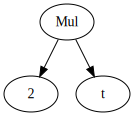

In [119]:
#print(sy.dotprint(2*t))
Source(sy.dotprint(2*t))

In [11]:
sy.singleton.S.Zero

0

In [29]:
q = sy.Function("q")
t = sy.Symbol("t")
t2 = sy.Symbol("t2")
i = sy.integrate(q(t),t)
sy.diff(i, q(t))
print(t._eval_derivative)
def funderiv(self,s):
    print(self)
    print(s)
    print(s.func == self.func)
    if sEq(s.func ,self.func):
        print(sy.DiracDelta(s.args[0] - self.args[0]))
        return sy.DiracDelta(s.args[0] - self.args[0])
    if self.args[0] == s:
        return sy.Derivative(self, s)
    else:
        return sy.singleton.S.Zero

q._eval_derivative = funderiv
i = sy.integrate(q(t),t)
'''q    def _eval_derivative(self, s):
        if self == s:
            return S.One
        return S.Zero
'''
i
print("dirv")
i._eval_derivative(q(t2))
#sy.Delta(0)

q(t)
t
q(t)
t
q(t)
t
<bound method AtomicExpr._eval_derivative of t>
q(t)
t
False
q(t)
t
False
q(t)
t
False
dirv
q(_u)
_xi_0
False


Integral(0, t)

Integral((dq(t) + q(t))**2 + Derivative(dq(t) + q(t), t)**2, t) - Integral(q(t)**2 + Derivative(q(t), t)**2, t)
None


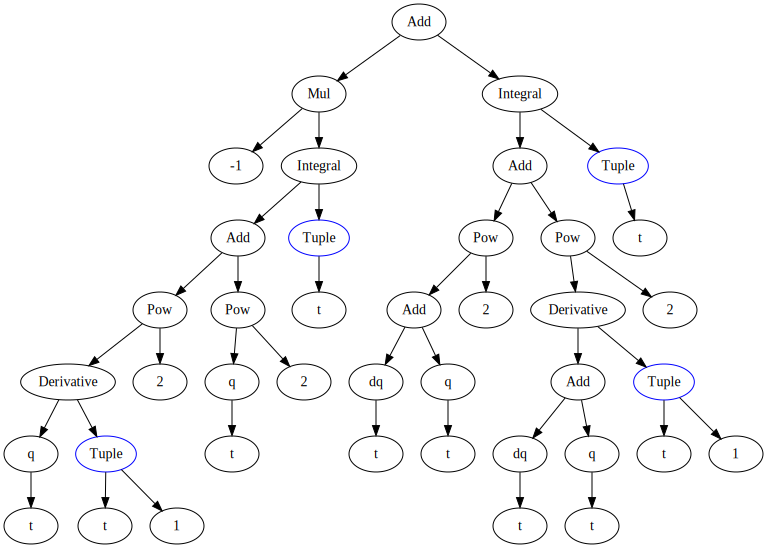

In [147]:

q = sy.Function("q")
t = sy.Symbol("t")
dq = sy.Function("dq")
qdot = sy.diff(q(t),t)
L = qdot**2 + q(t)**2
S = sy.integrate(L,t)
sy.diff(S,q(t)) # Nope.
dS = S.replace(q(t), q(t) + dq(t)) - S
#dS.collect(dq(t))
dS
#Source(sy.dotprint(dS.doit().expand().simplify().collect( dq(t) ).replace(dq(t)**2 , 0)))
#sy.integrate( qdot , t) # ok it knows this much


def ibp(e,u = None, dv = None):
    if e.func == sy.Integral:
        
        integrand = e.args[0]
        t = e.args[1][0]
        if u != None:
            dv = integrand / u
        if dv != None:
            u = integrand / dv
        v = sy.integrate(dv)
        du = sy.diff(u)
        return u * v - sy.Integral( v * du , t )
# sy.Integral.ibp = ibp # this could remove the first check.

# sy.Basic.__get_index__(self,n) = self.args[n]
# sy.Basic.push(n) = child =  self.args[n]; child.pop = lambda : self.args[n] = ; return child  
# sy.Basic.
# child.set ? child.cb ?   very lensy what we're doing.

ibp( sy.integrate( t * sy.diff(q(t), t)  ) , dv = sy.diff(q(t),t) )
dS.doit().replace(dq(t)**2, 0).replace(sy.Derivative(dq(t),t)**2, 0).expand().simplify()

def flippy(e):
    if e.func == sy.Integral:
        integrand = e.args[0]
        if integrand.func == sy.Add:
            return sy.Add( [sy.Integral( a ) for a in integrand.args ] )
    if e.func == sy.Add:
        if all([ a.func == sy.Integral for a in e.args]):
            return sy.Integral( sy.Add( [a.args[0] for a in e.args]))
            
print(dS)
sy.dotprint(dS)
print(flippy(dS))
Source(sy.dotprint(dS))
#def ibp(e, u = , dv =):
#    pass
#sy.srepr(sy.integrate( t * qdot , t)) 

In [123]:
dS.args[0].func

sympy.core.mul.Mul

In [ ]:
q = sy.Symbol("q")
qdot = sy.Symbol("qdot")



In [98]:
u = sy.Function("u")
v = sy.Function("v")
t = sy.Symbol("t")

e = sy.integrate(sy.diff(u(t) * v(t) , t) , t)
e1 = sy.Integral(sy.Derivative(u(t) * v(t) , t) , t)
e1.args[0].doit()
#e.expand().simplify() + e1 - e1.doit()

#cursor. e[1][2].swap(1,2).ap( lambda x: x + 7).expand.simplify.
class Cursor(Basic):
    def __init__(self, expr):
        self.exprs = [expr]
        self
    def 

def linear(e):
    if e.func == Add:
        # distribute addition under all the stuff, derivative, integral
    elif e.func == Integrate:
    elif e.func == Derivative:
        
        
#funsort = Sort()
#diff = Function(funsort,funsort)

# push 
# pop


TypeError: 'Integral' object is not subscriptable

In [ ]:
'''synthetic calculus in z3py

This is the analog of second order arithemtic in a vagye way
But also just having the idea of a syntax tree for functions made of composition, powers, trig, etc.
I like that we define stuff basically by it's differential equation
Unfortunately, with 

How to deal with integration? Maybe these shuld be function sets?

'''
fun = Sort()
diff = Function(fun, fun)
integ = Function(fun,fun)
diff(integ(x)) = x
integ(diff(x)) = x + C?
add = Function(fun,fun,fun) 
mul = Function(fun,fun,fun)
sub = 
compose = Function(fun,fun,fun)
diff(    )

apply = Function(fun, real, real) # eval?

cos = Const(fun)
sin = Const(fun)
exp = Const(fun)

# definition by diff eq
diff(cos) == negate(sin)
diff(sin) == cos
diff(exp) == exp


const = Function(real, fun)
power = Function(Int, fun) # power of x

ForAll([n], diff(power(n)) == (const n) * power(n-1))

distinct( everything )
# it's ultimately pretty similar to havign a syntax tree.


inverse = Function(fun,fun)



In [ ]:
https://abelian.readthedocs.io/en/latest/index.html
    https://desr.readthedocs.io/en/latest/_modules/desr/matrix_normal_forms.html#is_hnf_row
        https://github.com/tclose/Diophantine
            

In [1]:
sy.Matrix([[2,4],[2,4]]).nullspace()
sy.eye(3)[8]
sy.ones(3,2)
sy.ones(3)
sy.ones(2,1).nullspace()
sy.ones(2,1).columnspace()
def k(i,j):
    if i == j:
        return -2
    elif abs(i-j) == 1:
        return 1
    else:
        return 0
sy.Matrix(5,5, k)

NameError: name 'sy' is not defined

In [ ]:
# different stock sympy matrix solvers
s = sy.Symbol("s")


#sy.Matrix([[2-s,4],[2,4]]).QRdecomposition()
print(sy.Matrix([[2-s**2,4],[2 + 2*2,4 + 3*s**2]]).LUdecomposition())
print(sy.Matrix([[2-s,4],[2,4]]).LUdecompositionFF())
print(sy.Matrix([[2-s,4],[2,4]]).echelon_form(with_pivots=True))
print(sy.Matrix([[2-s,4],[2,4]]).columnspace())
print(sy.Matrix([[2-s,4],[2,4]]).rref())

Gaussian elimination is related to grobner bases.
a matrix is a linear system of equations
nx + my + b = 0


sure we can add together two rows in such a way as to clear out x, and add this to our set of equations. This is an S polynomial step. Then the reduction step is division of all with respect to the others.

Division of polynomials is the analog of inverting a tridiagonal matrix? division with remainder may be the analog of some kind of tridiagonal spliting


Pivoting columns corresponds to changing a variable ordering.


Is LU decomposition of a polynomial matrix acceptable?

row echelon form can be used to find the nullspace


finitely presented = hrep (finite syzygy modue)
finitely generated = vrep

monomial submodules
a monomial vector is a monomial in ne ocmposnent and zero everywhere else
division is defined compoenentwise
likewise lcm gcd

monomial ideal is analog of a susbpace that lines up nicely with coordinate axes.
If I had a just the first 3 coordinates can be nonzero.
Let {m1, . . . , mt} be a set of monomial generators for a monomial sub- module of Rm, and let ε1, . . . , εt denote the standard basis vectors in
t
R . Let mij = LCM(mi, mj). The syzygy module Syz(m1, . . . , mt)
is generated by the syzygies σij = (mij/mi)εi − (mij/mj)εj, for all 1≤i<j≤t(σij =0unlessmi andmj containthesamestandard basis vector in Rm).


The least common multiple is defined to be zero if not on the same basis element
we can achieve this by
lcm( ).replace(gens, 0) . No . we need to check


def lcm_module(f,g, gens):
   lcm = sy.lcm(f,g,gens, )
   if lcm


the null space is just generated by the untouched indices
if you gave me a kernel rep, the gens are the ones that are zero.

the monomial syzygy module should be liftable by buchberger





reduced and Groebenr.reduce return division by a basis.

eqns = from_matrix()
mod_basis = to_matrix
def spolymat(basis,gens):
    for i,f in enumeratie(basis):
       for j,g in enumerate(basis):
          ltf = sy.LT(f,gens)
          ltg = sy.LT(g,gens)
          lcm = sy.lcm(ltf,ltg)
          #lcm(lt(f), lt(g))
          s = lcm / lt(g) * f - lcm / lt(f) * g
          coeff, remain = basis.reduce(s)
          assert(remain == 0) #should be grobner basis.
          s[i][j] = np.zeros()
          s[i][j]



    def _kernel(self):
        """Compute the kernel of ``self``."""
        raise NotImplementedError

    def _image(self):
        """Compute the image of ``self``."""
        raise NotImplementedError
        
        You cheeky fuckers
        
        """
        
https://www.maplesoft.com/support/help/Maple/view.aspx?path=Groebner%2fBasis_details
Interesting. They are using a single parameter and holding different compoenents of the module with the powers of that parameter.
multiplication by tht aprameter is nonsensical though?
 
They are tracking the connection of the new generators to the old via an extended matrix formulation very similar to what one does derving the inverse matrix using gaussian elimination


Fairbanks span rep 
[A 0]
[0 -B]
equalizer rep


I was saying that "unfortunately" it feels like we really need to syzygies of the other direction, combining columns, which is nonsensical
However, if we can track this decomposition, maybe we're ok
The syzygies of the columns are the generators of the "nullspace" of the module.
Maybe we don't even need to track?

a column [a,b,c] -> (ax + by + cz)
compute grobner basis with tags

syzygies of syzygies gives second syzygies
but syzgy of syzygy transpose gives back oifinal system.

does doing gaussian elimination give 


Multiplying a matrix times a vector returns a vectorcsupplied sum of columns.

we could row reduce first I guess. Maybe getting to row reduced echelon form does take column ops


Buchberger's algorithm 

What is an equivalent system of linear equations? Well, we can copy any equation twice. That adds no new information. We can scalar multiply an entire equation, because we can always undo the scalar multiplication by division. We can produce a new equation as a sum of the others. These are all safe.
If we just drop an equation, obviously in general we can't say that maintains the same system. If the equation is identically 0=0, then we can safely drop it.
We can always safely add new derived equations to our set of equations.
We can drop 0=0 safely
We can mutate an equation in place by adding another equation to it, or scalar multiplying it


For equations over rings, we can do all except scalar multiplication. We can only


In gaussian elimination, we're used to the matrix staying the same or maybe shrinking in some sense if we can clear an entire row.
In buchburger's

make a grobner basis for the columns

on this grobner basis it is easy to find the generators of the syzygies

back translate these syzygies to the roginal relevant generator. For this we need to track the matrix that connects the grobner basis to the orignal generators

G = FA
F = GB

B can be computed via reduction with respect to G. G is "triangular" so we can invert it with remainder

Anything = GB + r


G = GBA
F = FAB

fascinating. AB/BA are not necessarily identity matrices. This has some flavor of an adjunction? I'm just vibin on quasi inverses. maybe not.

a syzygy of G is 
Gs = 0 = FAs = 0
Hence As is a syzygy
we may remove a lot of stupid stuff during grobner basis calculation

I - AB columns are syzygys of F. F (I - AB) = F - FAB = F- F = 0  

proposition 3.8


G = FA is the analog of L = A U^-1. we build the U matrix by tracking the gaussian elimination operations

G = GABAB = GAB


My stratagem for understandig things:
Anything that works for modules also works for vector spaces. Grobner basis algorithms are analogs of gaussian elimination and LU decomposition.



Free  resolution gives completeness ocndition of solution?
equivalent to d + c = n in linear algebra.

Like, what if I didn't believe I had gotten all of the generators.
The exactness condition is easy to check. multiply subsequent matrices and get zero




rank of a module?

they define presentation as generators and syzygy, This is the same as a HV representation. What is that called? Dual? double description.

Overcomplex sets. Especially for polytopes, it is not clear a priori that you have too many V 


        

In [ ]:
#grobner tracking. Maintaining the relation of the grobner basis to the original
def extended_grobner(eqns, gens):
    s = sy.Dummy("s")
    n = len(eqns)
    extended = [  s**n * eq + s**i for i, eq in enumerate(eqns)]
    g = sy.groebner(eqns, gens, s)
    

In [23]:
import sympy as sy
x,y,z,s = sy.symbols("x y z s")
F = [x+y+z, x*y+y*z+z*x, x*y*z-1]
n = len(F)
Fext = [  s**(n+1) * eq + s**(i+1) for i, eq in enumerate(F)] # to avoid havi
#ng a s**0 term which was slightly annoying to extract

In [25]:
Fext

[s**4*(x + y + z) + s, s**4*(x*y + x*z + y*z) + s**2, s**4*(x*y*z - 1) + s**3]

In [26]:
Gext = sy.groebner(Fext, x, y, z, s)

In [29]:
Gext

GroebnerBasis([-s**2*x - s**2*y - s**2*z + s*x*y + s*x*z + s*y*z, s**3*x + s**3*y + s**3*z - s**2*x*z - s**2*y*z - s**2*z**2 + s*x*z**2 + s*y*z**2 + s, s**4*x + s**4*y + s**4*z + s, s**3*y**2 + s**3*y*z + s**3*z**2 - s**2*y**2*z - s**2*y*z**2 - s**2 + s*y**2*z**2 + s*y + s*z, s**4*y**2 + s**4*y*z + s**4*z**2 - s**2 + s*y + s*z, s**4*z**3 - s**4 + s**3 - s**2*z + s*z**2], x, y, z, s, domain='ZZ', order='lex')

In [27]:
Gext[0]

-s**2*x - s**2*y - s**2*z + s*x*y + s*x*z + s*y*z

In [34]:
m = sy.Matrix([[g.coeff(s**i) for i in range(1,n+2)] for g in Gext])
m

Matrix([
[    x*y + x*z + y*z,           -x - y - z,                 0,                 0],
[x*z**2 + y*z**2 + 1,    -x*z - y*z - z**2,         x + y + z,                 0],
[                  1,                    0,                 0,         x + y + z],
[  y**2*z**2 + y + z, -y**2*z - y*z**2 - 1, y**2 + y*z + z**2,                 0],
[              y + z,                   -1,                 0, y**2 + y*z + z**2],
[               z**2,                   -z,                 1,          z**3 - 1]])

In [47]:
m2 = m[2,:].col_join(m[4,:]).col_join(m[5,:])
m2

Matrix([
[    1,  0, 0,         x + y + z],
[y + z, -1, 0, y**2 + y*z + z**2],
[ z**2, -z, 1,          z**3 - 1]])

In [46]:
G = m2[:,3]
G

Matrix([
[        x + y + z],
[y**2 + y*z + z**2],
[         z**3 - 1]])

In [49]:
A = m2[:,:3]
A

Matrix([
[    1,  0, 0],
[y + z, -1, 0],
[ z**2, -z, 1]])

In [53]:
Fm = sy.Matrix(F)
Fm

Matrix([
[      x + y + z],
[x*y + x*z + y*z],
[      x*y*z - 1]])

In [67]:
sy.simplify(A * Fm) - G

Matrix([
[0],
[0],
[0]])

To write F in terms of G is easy by greobenr property. F = GB
G = FA



In [76]:
B = sy.Matrix([sy.reduced(f,list(G), x,y,z)[0] for f in F])
B

Matrix([
[    1,  0, 0],
[y + z, -1, 0],
[  y*z, -z, 1]])

In [79]:
sy.simplify(B * G) - Fm

Matrix([
[0],
[0],
[0]])

In [81]:
sy.simplify(A * B)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [82]:
sy.simplify(B * A)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [84]:
import sympy as sy
x,y,z, a,b,c = sy.symbols("x y z a b c")
F = [x+y+z, x*y+y*z+z*x, x*y*z-1]
n = len(F)
Fext = [F[0] + a, F[1] + b, F[2] + c]
#ng a s**0 term which was slightly annoying to extract
Fext

[a + x + y + z, b + x*y + x*z + y*z, c + x*y*z - 1]

In [88]:
G = sy.groebner(Fext, x,y,z, a,b,c)
[[g.coeff(a),g.coeff(b), g.coeff(c)]  for g in G]

[[1, 0, 0], [y + z, -1, 0], [z**2, -z, 1]]

In [89]:
A

Matrix([
[    1,  0, 0],
[y + z, -1, 0],
[ z**2, -z, 1]])

So this method seems to get us the same thing. When I picked the wrong ordering for a,b,c it doesn't do anything though. That is worrying

How can I be more systematic?
How do I know i have a complete set of generators?


In [94]:
sy.polys.groebnertools.spoly(f,g,ring)
from sympy.polys.rings import PolyRing
ring = PolyRing(opt.gens, opt.domain, opt.order)

TypeError: spoly() missing 3 required positional arguments: 'p1', 'p2', and 'ring'

In [97]:
dir(sy.Poly(s**2))

['EC',
 'EM',
 'ET',
 'LC',
 'LM',
 'LT',
 'TC',
 '__abs__',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '_accept_eval_derivative',
 '_args',
 '_assumptions',
 '_compare_pretty',
 '_constructor_postprocessor_mapping',
 '_diff_wrt',
 '_eval_adjoint',
 

In [99]:
G[0]

a + x + y + z

In [111]:
f = G[0]
g = G[1]
print("f ", f)
print("g ", g)
gens = (x,y,z)
ltf = sy.LT(f,gens)
print("ltf ", ltf)
ltg = sy.LT(g,gens)
print("ltg ", ltg)
lcm = sy.lcm(ltf,ltg)
print("lcm ", lcm)
#lcm(lt(f), lt(g))
s = lcm / ltg * f - lcm / ltf * g

f  a + x + y + z
g  a*y + a*z - b + y**2 + y*z + z**2
ltf  x
ltg  y**2
lcm  x*y**2


In [112]:
sy.reduced(s,G, gens)

([x, -y**2, 0], 0)

In [185]:
def spoly(f,g,*gens):
    ltf = sy.LT(f,gens)
    ltg = sy.LT(g,gens)
    lcm = sy.lcm(ltf,ltg)
    s = lcm / ltf * f - lcm / ltg * g
    return s

#grobner tracking. Maintaining the relation of the grobner basis to the original
def extended_groebner(F, *gens):
    n = len(F)
    markers =  [sy.Dummy() for i in range(n)]
    Fext = [ f + a for a, f in zip(markers, F)]
    gen_ext = list(gens) + markers
    Gext = sy.groebner(Fext, gen_ext)
    A = [[g.coeff(m) for m in markers ] for g in Gext]
    G = [ sy.simplify(g - sum( [ m * aa  for m,aa in zip(markers, a)  ] )) for a,g in zip(A,Gext) ] #remove dummy parts
    assert( sy.simplify(sy.Matrix(G) -  sy.Matrix(A) * sy.Matrix(F)).is_zero )
    # maybe assert buchberger criterion
    return G, A
    
    
def reduce_basis(F,G,*gens):
    B,rems = list(zip(*[sy.reduced(f,G, gens) for f in F]))
    print(B)
    print(rems)
    assert( all([r == 0 for r in rems] )) # assuming G is a grobner basis
    assert( sy.simplify(sy.Matrix(F) - sy.Matrix(B) * sy.Matrix(G)).is_zero   )
    return B

# generators for the syzygies of G. Schreyer's Theorem. Cox Little Oshea Theorem 3.2 chapter 5
def syzygy(G,*gens): # assuming G is groebner basis
    n = len(G)
    basis = []
    I = sy.eye(n)
    for i, gi in enumerate(G):
        for j, gj in enumerate(G): 
            if i < j:
                s = spoly(gi,gj,*gens)
                print(s)
                a,r = sy.reduced( s , G, gens )
                assert(r == 0) # should be groebner basis
                lti = sy.LT(gi,gens)
                ltj = sy.LT(gj,gens)
                lcm = sy.lcm(lti,ltj)
                ei = I[:,i] 
                ej = I[:,j]
                basis.append(lcm / lti * ei - lcm / ltj * ej - sy.Matrix(a))
                assert( sy.simplify(sy.Matrix(G).T * basis[-1]).is_zero)  # should all null out on G
    return basis
            

In [186]:
x,y,z,s = sy.symbols("x y z s")
F = [x+y+z, x*y+y*z+z*x, x*y*z-1]
G, A = extended_groebner(F, x,y,z)
B = reduce_basis(F,G,x,y,z)
Gsyz = syzygy(G)

([1, 0, 0], [y + z, -1, 0], [y*z, -z, 1])
(0, 0, 0)
-x*(y**2 + y*z + z**2) + y**2*(x + y + z)
-x*(z**3 - 1) + z**3*(x + y + z)
-y**2*(z**3 - 1) + z**3*(y**2 + y*z + z**2)
